### This is to filter the results data for analysis of the hierarchical parameter and convergence of the McMC inversion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

### Linear Delauynay Parametrization analysis

In [14]:
def histogram (no_files):
    
    first_histogram = np.loadtxt("results/khistogram.txt-000")
    rows = first_histogram.shape[0]
    nodes = first_histogram[:,0]

    total1 = np.zeros(rows)
    total2 = np.zeros(rows)

    for i in range(no_files):

        histogram = np.loadtxt(f"results/khistogram.txt-{i:03d}")
        total1 += histogram[:,1]
        total2 += histogram[:,2]

    return nodes, total1, total2

In [15]:
def hierarchical(no_files):
    
    parameter_snow = []
    parameter_ice= []
    
    for i in range(no_files):
        file = f'results/log.txt-{i:03d}'
        
        with open(file) as f:
            target_line = False

            for line in f:
                if target_line:
                    data = line.split()
        
                    parameter_snow.append(float(data[0]))
                    parameter_ice.append(float(data[1]))
                    
                    target_line=False

                if "Lambda(s)" in line:
                    target_line = True

    return parameter_snow, parameter_ice

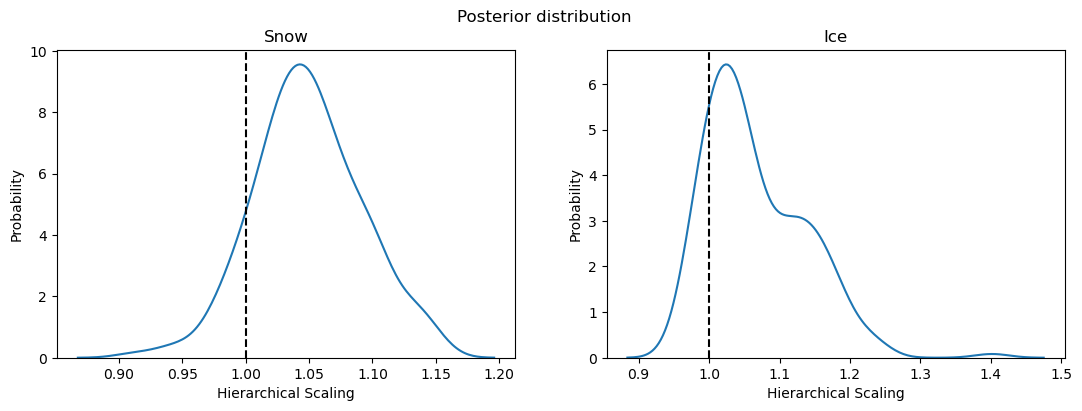

In [107]:
hierarchical_snow, hierarchical_ice = hierarchical(4)

plt.figure(figsize=(13,4))
plt.suptitle("Posterior distribution")

plt.subplot(1,2,1)
sns.kdeplot(hierarchical_snow)
plt.axvline(1, color= 'black', linestyle ='--')
plt.xlabel('Hierarchical Scaling')
plt.ylabel('Probability')
plt.title('Snow')

plt.subplot(1,2,2)
sns.kdeplot(hierarchical_ice)
plt.axvline(1, color= 'black', linestyle ='--')
plt.xlabel('Hierarchical Scaling')
plt.ylabel('Probability')
plt.title('Ice')

plt.show()


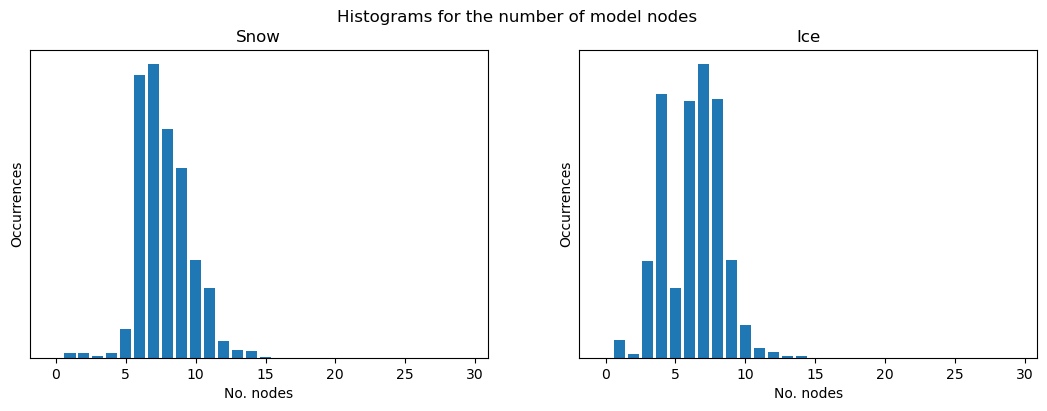

In [108]:
nodes, snow, ice = histogram(4)

plt.figure(figsize=(13,4))
plt.suptitle('Histograms for the number of model nodes')

plt.subplot(1,2,1)
plt.bar(nodes[:30],snow[:30])
plt.title('Snow')
plt.xlabel('No. nodes')
plt.ylabel('Occurrences')
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

plt.subplot(1,2,2)
plt.bar(nodes[:30],ice[:30])
plt.title('Ice')
plt.xlabel('No. nodes')
plt.ylabel('Occurrences')

plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

plt.show() 


In [2]:
# Load observation data (1200 rows, first 600 is snow, last 600 is ice)
observations = np.loadtxt("synthetic/synthetic_obs.txt", skiprows = 1)
all_residuals = np.zeros((4, len(observations)))
n = 600

# Load residuals for each chain
for i in range(4):
    all_residuals[i] = np.loadtxt(f'results/residuals.txt-00{i}')

# Calculate separate errors for snow (first 600 rows) and ice (last 600 rows)
errors_snow= np.mean(all_residuals[:, :n], axis = 0)
errors_ice = np.mean(all_residuals[:, n:], axis = 0)

results =[]
# Calculate separate statistical values for snow and ice
rmse_snow = np.sqrt(np.mean((errors_snow)**2))
md_snow = np.mean(errors_snow)
r2_snow = r2_score(observations[:n, 3], observations[:n, 3] + errors_snow)

rmse_ice = np.sqrt(np.mean((errors_ice)**2))
md_ice = np.mean(errors_ice)
r2_ice = r2_score(observations[n:, 3], observations[n:, 3] + errors_ice)

results.append([rmse_snow, md_snow, r2_snow, rmse_ice, md_ice, r2_ice])


In [3]:
plt.scatter()
pd.DataFrame(results, columns=['RMSE','MD','R^2','RMSE','MD','R^2'])

,RMSE,MD,R^2,RMSE,MD,R^2
0,0.09973,0.000171,0.155624,0.097516,0.006314,0.610299


         MD      RMSE        R2
0  0.006325  0.031443  0.914189


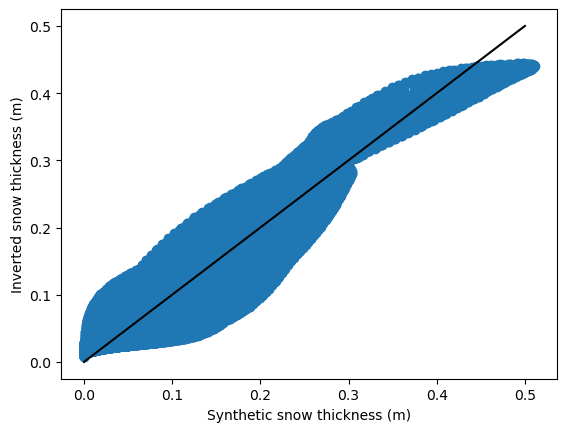

In [9]:
imgA = np.loadtxt("synthetic/syntheticobs_true.img.A")
file_snow = f"images/snow"
snow = np.loadtxt(file_snow)

results = []
error = snow.ravel() - imgA.ravel()
md = np.mean(error)
rmse = np.sqrt( np.mean( (error)**2 ))
r2 = r2_score(imgA.ravel(), snow.ravel())
results.append([md, rmse, r2])
print (pd.DataFrame (results, columns = ['MD', 'RMSE', 'R2']) )

x = y = [0,0.5]
plt.scatter(imgA.ravel(),snow.ravel())
plt.plot(x, y, 'k-')
plt.xlabel('Synthetic snow thickness (m)')
plt.ylabel('Inverted snow thickness (m)')
plt.show()


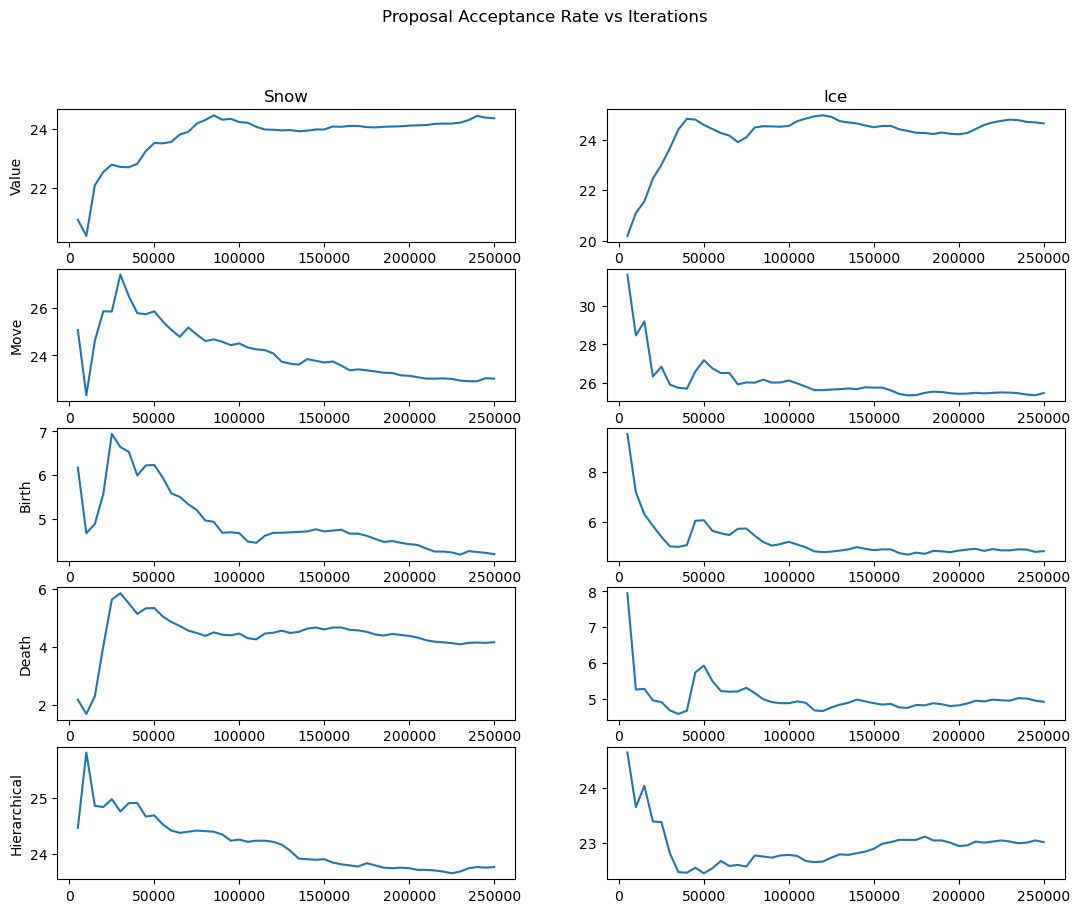

In [111]:
file = 'results/log.txt-000'

iterations = np.arange(5000,250001,5000)

keywords = ["Value", "Move", "Birth", "Death", "Hierarchical"]

rate = {key: {"snow": [], "ice": []} for key in keywords}

with open(file) as f:
    for line in f:
        data = line.split()

        for key in keywords:
            if key in line:
                rate[key]["snow"].append(float(data[4]))
                rate[key]["ice"].append(float(data[9]))
            

plt.figure(figsize=(13,10))
plt.suptitle('Proposal Acceptance Rate vs Iterations')

plt.subplot(5,2,1)
plt.plot(iterations, rate["Value"]["snow"], '-')
plt.ylabel("Value")
plt.title('Snow')

plt.subplot(5,2,2)
plt.plot(iterations, rate["Value"]["ice"],'-')
plt.title('Ice')

plt.subplot(5,2,3)
plt.plot(iterations, rate["Move"]['snow'],'-')
plt.ylabel("Move")

plt.subplot(5,2,4)
plt.plot(iterations, rate["Move"]['ice'],'-')

plt.subplot(5,2,5)
plt.plot(iterations, rate["Birth"]['snow'],'-')
plt.ylabel("Birth")
plt.subplot(5,2,6)
plt.plot(iterations, rate["Birth"]['ice'],'-')

plt.subplot(5,2,7)
plt.plot(iterations, rate["Death"]['snow'],'-')
plt.ylabel("Death")
plt.subplot(5,2,8)
plt.plot(iterations, rate["Death"]['ice'],'-')

plt.subplot(5,2,9)
plt.plot(iterations, rate["Hierarchical"]['snow'],'-')
plt.ylabel("Hierarchical")
plt.subplot(5,2,10)
plt.plot(iterations, rate["Hierarchical"]['ice'],'-')

plt.show()

### Clough-Tocher Delaunay parametrization

In [21]:
def histogram (no_files):
    
    first_histogram = np.loadtxt("resultsclough/khistogram.txt-000")
    rows = first_histogram.shape[0]
    nodes = first_histogram[:,0]

    total1 = np.zeros(rows)
    total2 = np.zeros(rows)

    for i in range(no_files):

        histogram = np.loadtxt(f"resultsclough/khistogram.txt-{i:03d}")
        total1 += histogram[:,1]
        total2 += histogram[:,2]

    return nodes, total1, total2

def hierarchical(no_files):
    
    parameter_snow = []
    parameter_ice= []
    
    for i in range(no_files):
        file = f'resultsclough/log.txt-{i:03d}'
        
        with open(file) as f:
            target_line = False

            for line in f:
                if target_line:
                    data = line.split()
        
                    parameter_snow.append(float(data[0]))
                    parameter_ice.append(float(data[1]))
                    
                    target_line=False

                if "Lambda(s)" in line:
                    target_line = True

    return parameter_snow, parameter_ice

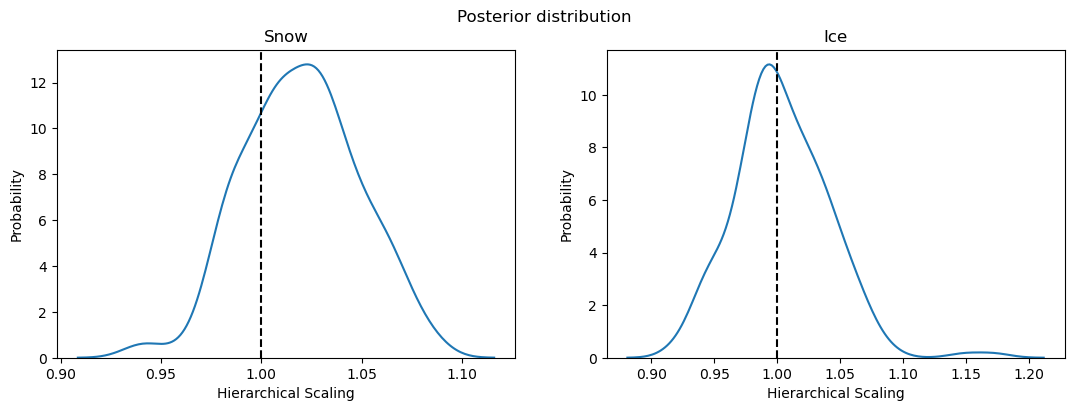

In [22]:
hierarchical_snow, hierarchical_ice = hierarchical(4)

plt.figure(figsize=(13,4))
plt.suptitle("Posterior distribution")

plt.subplot(1,2,1)
sns.kdeplot(hierarchical_snow)
plt.axvline(1, color= 'black', linestyle ='--')
plt.xlabel('Hierarchical Scaling')
plt.ylabel('Probability')
plt.title('Snow')

plt.subplot(1,2,2)
sns.kdeplot(hierarchical_ice)
plt.axvline(1, color= 'black', linestyle ='--')
plt.xlabel('Hierarchical Scaling')
plt.ylabel('Probability')
plt.title('Ice')

plt.show()


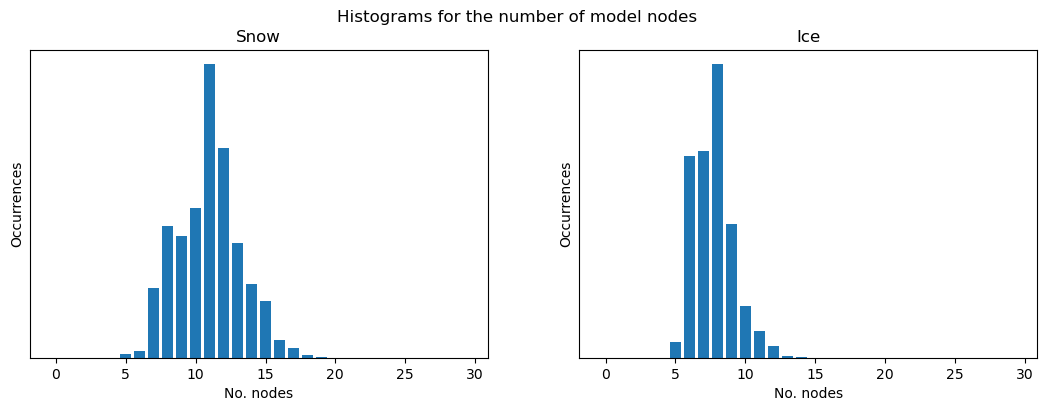

In [23]:
nodes, snow, ice = histogram(4)

plt.figure(figsize=(13,4))
plt.suptitle('Histograms for the number of model nodes')

plt.subplot(1,2,1)
plt.bar(nodes[:30],snow[:30])
plt.title('Snow')
plt.xlabel('No. nodes')
plt.ylabel('Occurrences')
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

plt.subplot(1,2,2)
plt.bar(nodes[:30],ice[:30])
plt.title('Ice')
plt.xlabel('No. nodes')
plt.ylabel('Occurrences')

plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

plt.show() 


In [24]:
# Load observation data (1200 rows, first 600 is snow, last 600 is ice)
observations = np.loadtxt("synthetic/synthetic_obs.txt", skiprows = 1)
all_residuals = np.zeros((4, len(observations)))

# Load residuals for each chain
for i in range(4):
    all_residuals[i] = np.loadtxt(f'resultsclough/residuals.txt-00{i}')

# Calculate separate errors for snow (first 600 rows) and ice (last 600 rows)
errors_snow= np.mean(all_residuals[:, :600], axis = 0)
errors_ice = np.mean(all_residuals[:, 600:], axis = 0)

results =[]
# Calculate separate statistical values for snow and ice
rmse_snow = np.sqrt(np.mean((errors_snow)**2))
md_snow = np.mean(errors_snow)
r2_snow = r2_score(observations[:600, 3], observations[:600, 3] + errors_snow)

rmse_ice = np.sqrt(np.mean((errors_ice)**2))
md_ice = np.mean(errors_ice)
r2_ice = r2_score(observations[600:, 3], observations[600:, 3] + errors_ice)

results.append([rmse_snow, md_snow, r2_snow, rmse_ice, md_ice, r2_ice])

prior_snow = [0,0.6]
prior_ice = [0,6]

pd.DataFrame(results, columns=['RMSE','MD','R^2','RMSE','MD','R^2'])


,RMSE,MD,R^2,RMSE,MD,R^2
0,0.099847,-0.000937,0.153627,0.097473,0.007127,0.610636


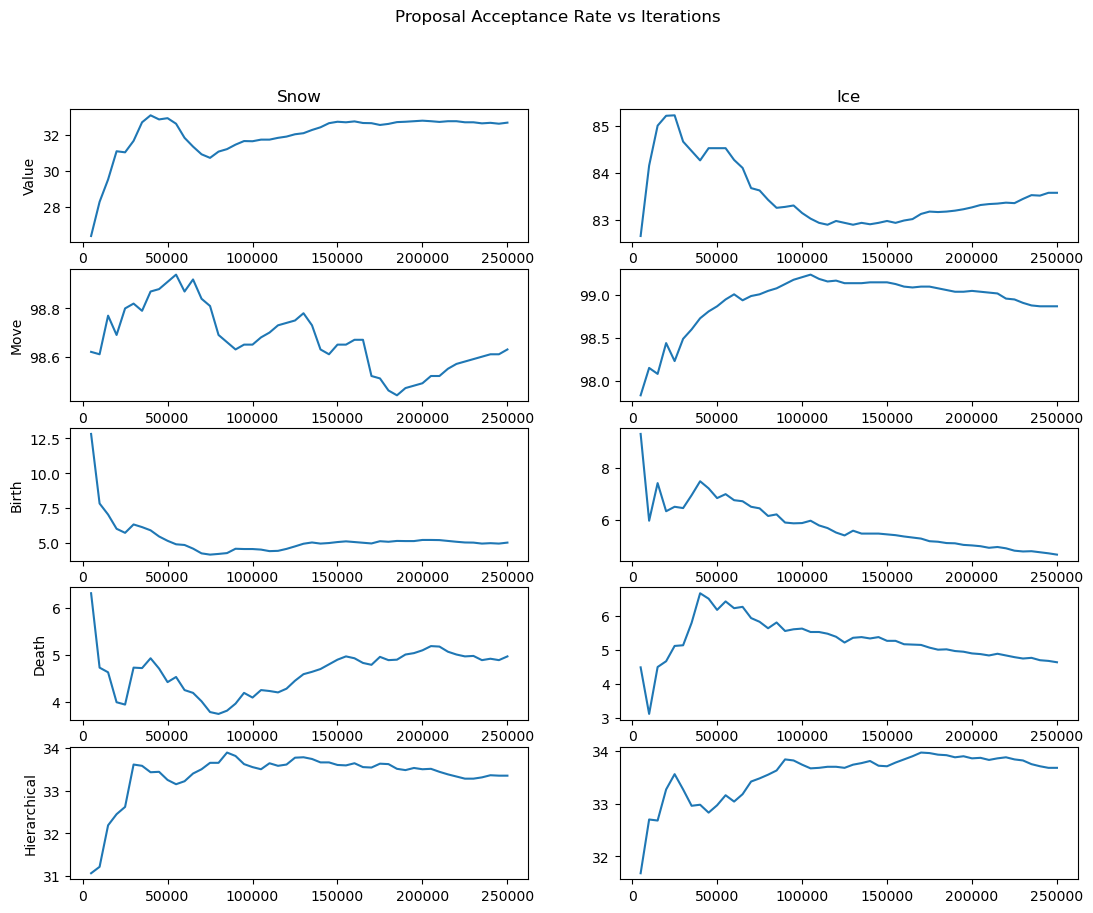

In [25]:
file = 'resultsclough/log.txt-000'

iterations = np.arange(5000,250001,5000)

keywords = ["Value", "Move", "Birth", "Death", "Hierarchical"]

rate = {key: {"snow": [], "ice": []} for key in keywords}

with open(file) as f:
    for line in f:
        data = line.split()

        for key in keywords:
            if key in line:
                rate[key]["snow"].append(float(data[4]))
                rate[key]["ice"].append(float(data[9]))
            

plt.figure(figsize=(13,10))
plt.suptitle('Proposal Acceptance Rate vs Iterations')

plt.subplot(5,2,1)
plt.plot(iterations, rate["Value"]["snow"], '-')
plt.ylabel("Value")
plt.title('Snow')

plt.subplot(5,2,2)
plt.plot(iterations, rate["Value"]["ice"],'-')
plt.title('Ice')

plt.subplot(5,2,3)
plt.plot(iterations, rate["Move"]['snow'],'-')
plt.ylabel("Move")

plt.subplot(5,2,4)
plt.plot(iterations, rate["Move"]['ice'],'-')

plt.subplot(5,2,5)
plt.plot(iterations, rate["Birth"]['snow'],'-')
plt.ylabel("Birth")
plt.subplot(5,2,6)
plt.plot(iterations, rate["Birth"]['ice'],'-')

plt.subplot(5,2,7)
plt.plot(iterations, rate["Death"]['snow'],'-')
plt.ylabel("Death")
plt.subplot(5,2,8)
plt.plot(iterations, rate["Death"]['ice'],'-')

plt.subplot(5,2,9)
plt.plot(iterations, rate["Hierarchical"]['snow'],'-')
plt.ylabel("Hierarchical")
plt.subplot(5,2,10)
plt.plot(iterations, rate["Hierarchical"]['ice'],'-')

plt.show()

### Voronoi Parametrization analysis

In [26]:
def histogram (no_files):
    
    first_histogram = np.loadtxt("resultsvoronoi/khistogram.txt-000")
    rows = first_histogram.shape[0]
    nodes = first_histogram[:,0]

    total1 = np.zeros(rows)
    total2 = np.zeros(rows)

    for i in range(no_files):

        histogram = np.loadtxt(f"resultsvoronoi/khistogram.txt-{i:03d}")
        total1 += histogram[:,1]
        total2 += histogram[:,2]

    return nodes, total1, total2

def hierarchical(no_files):
    
    parameter_snow = []
    parameter_ice= []
    
    for i in range(no_files):
        file = f'resultsvoronoi/log.txt-{i:03d}'
        
        with open(file) as f:
            target_line = False

            for line in f:
                if target_line:
                    data = line.split()
        
                    parameter_snow.append(float(data[0]))
                    parameter_ice.append(float(data[1]))
                    
                    target_line=False

                if "Lambda(s)" in line:
                    target_line = True

    return parameter_snow, parameter_ice

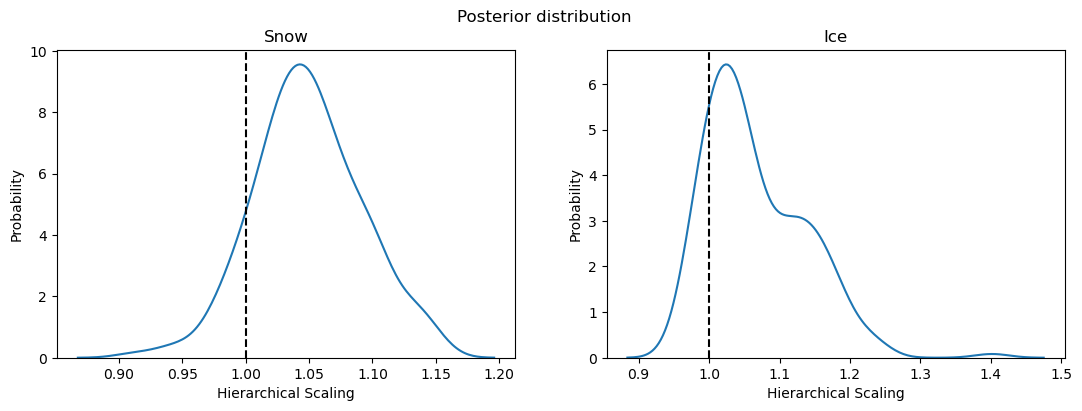

In [27]:
hierarchical_snow, hierarchical_ice = hierarchical(4)

plt.figure(figsize=(13,4))
plt.suptitle("Posterior distribution")

plt.subplot(1,2,1)
sns.kdeplot(hierarchical_snow)
plt.axvline(1, color= 'black', linestyle ='--')
plt.xlabel('Hierarchical Scaling')
plt.ylabel('Probability')
plt.title('Snow')

plt.subplot(1,2,2)
sns.kdeplot(hierarchical_ice)
plt.axvline(1, color= 'black', linestyle ='--')
plt.xlabel('Hierarchical Scaling')
plt.ylabel('Probability')
plt.title('Ice')

plt.show()


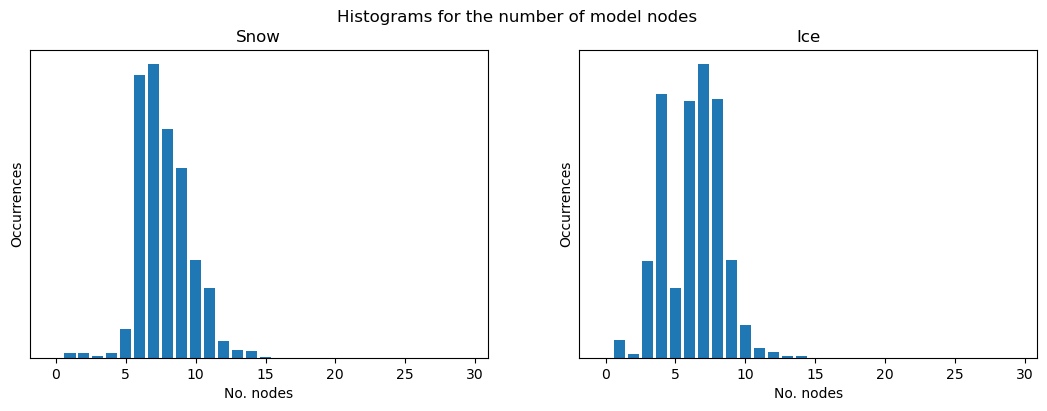

In [28]:
nodes, snow, ice = histogram(4)

plt.figure(figsize=(13,4))
plt.suptitle('Histograms for the number of model nodes')

plt.subplot(1,2,1)
plt.bar(nodes[:30],snow[:30])
plt.title('Snow')
plt.xlabel('No. nodes')
plt.ylabel('Occurrences')
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

plt.subplot(1,2,2)
plt.bar(nodes[:30],ice[:30])
plt.title('Ice')
plt.xlabel('No. nodes')
plt.ylabel('Occurrences')

plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

plt.show() 


In [2]:
# Load observation data (1200 rows, first 600 is snow, last 600 is ice)
observations = np.loadtxt("synthetic/synthetic_obs.txt", skiprows = 1)
all_residuals = np.zeros((4, len(observations)))

# Load residuals for each chain
for i in range(4):
    all_residuals[i] = np.loadtxt(f'resultsvoronoi/residuals.txt-00{i}')

# Calculate separate errors for snow (first 600 rows) and ice (last 600 rows)
errors_snow= np.mean(all_residuals[:, :600], axis = 0)
errors_ice = np.mean(all_residuals[:, 600:], axis = 0)

results =[]
# Calculate separate statistical values for snow and ice
rmse_snow = np.sqrt(np.mean((errors_snow)**2))
md_snow = np.mean(errors_snow)
r2_snow = r2_score(observations[:600, 3], observations[:600, 3] + errors_snow)

rmse_ice = np.sqrt(np.mean((errors_ice)**2))
md_ice = np.mean(errors_ice)
r2_ice = r2_score(observations[600:, 3], observations[600:, 3] + errors_ice)

results.append([rmse_snow, md_snow, r2_snow, rmse_ice, md_ice, r2_ice])

prior_snow = [0,0.6]
prior_ice = [0,6]

pd.DataFrame(results, columns=['RMSE','MD','R^2','RMSE','MD','R^2'])

,RMSE,MD,R^2,RMSE,MD,R^2
0,0.099082,-0.00062,0.166547,0.098613,0.002201,0.601481
